In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
from datetime import datetime
import math

In [77]:
data = pd.read_excel("/content/copy Problem Statement 2_ Data set.xlsx")
threshold = pd.read_excel("/content/copy Problem Statement 2_ Data set.xlsx",sheet_name=1)

In [78]:
data

,Id,Time,Machine,Component,Parameter,Value
0,48,2022-06-03 08:09:29,Excavator_1,Engine,Temparature,104.0
1,5,2022-05-12 02:05:42,Articulated_Truck_1,Fuel,Water in Fuel,70.0
2,24,2022-05-27 06:25:04,Articulated_Truck_1,Engine,Temparature,104.0
3,23,2022-05-12 20:36:47,Backhoe_Loader_1,Drive,Transmission Pressure,231.0
4,42,2022-06-28 04:06:30,Excavator_1,Engine,Oil Pressure,39.0
...,...,...,...,...,...,...
995,18,2022-06-29T16:29:54Z,Asphalt_Paver_1,Misc,Exhaust Gas Temparature,263.0
996,43,2022-06-29T16:52:23Z,Asphalt_Paver_1,Fuel,Level,7.0
997,28,2022-06-29T20:00:46Z,Asphalt_Paver_1,Misc,Air Filter Pressure,23.0
998,4,2022-06-30T14:09:21Z,Asphalt_Paver_1,Misc,Air Filter Pressure,26.0


In [79]:
threshold

,Parameter,Treshold,Probability of Failure
0,Engine Oil Pressure,"Low 25, High 65",High
1,Engine Speed,High 1800,Medium
2,Engine Temparature,High 105,High
3,Brake Control,Low 1,Medium
4,Transmission Pressure,Low 200 and High 450,Medium
5,Pedal Sensor,High 4.7,Low
6,Water Fuel,High 1800,High
7,Fuel Level,Low 1,Low
8,Fuel Pressure,Low 35 High 65,Low
9,Fuel Temparature,High 400,High


There are total 50 Id
Each Id is having 20 rows
so total 50*20 = 1000 rows

Text(0.5, 0, 'ID')

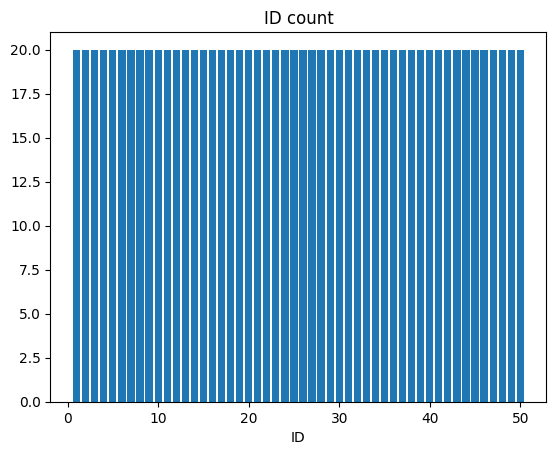

In [80]:
plt.bar(data['Id'].value_counts().index,data['Id'].value_counts())
plt.title('ID count')
plt.xlabel('ID')

In [81]:
data['Id'].nunique()

50

#There are total 5 Machines
Each machine is having 200 values
So total 200*5= 1000 rows

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Excavator_1'),
  Text(1, 0, 'Articulated_Truck_1'),
  Text(2, 0, 'Backhoe_Loader_1'),
  Text(3, 0, 'Dozer_1'),
  Text(4, 0, 'Asphalt_Paver_1')])

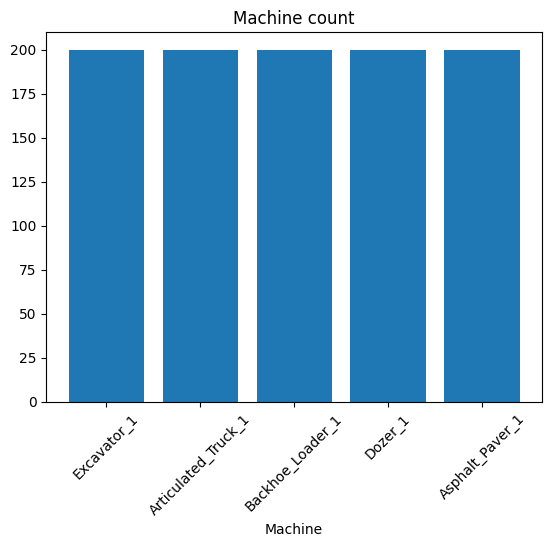

In [82]:
plt.bar(data['Machine'].value_counts().index,data['Machine'].value_counts())
plt.title('Machine count')
plt.xlabel('Machine')
plt.xticks(rotation=45)

In [83]:
machine_list = data['Machine'].unique()

Each Id is having 4 values for each machine
So total 5machine * 4 values = 20 rows for each ID

In [84]:
data[data['Machine']=='Excavator_1'].groupby(by=['Machine','Id']).count()

Time  Component  Parameter  Value
Machine     Id                                   
Excavator_1 1      4          4          4      4
            2      4          4          4      4
            3      4          4          4      4
            4      4          4          4      4
            5      4          4          4      4
            6      4          4          4      4
            7      4          4          4      4
            8      4          4          4      4
            9      4          4          4      4
            10     4          4          4      4
            11     4          4          4      4
            12     4          4          4      4
            13     4          4          4      4
            14     4          4          4      4
            15     4          4          4      4
            16     4          4          4      4
            17     4          4          4      4
            18     4          4          4      4
            19     4          4          4      4
            20     4          4          4      4
            21     4          4          4      4
            22     4          4          4      4
            23     4          4          4      4
            24     4          4          4      4
            25     4          4          4      4
            26     4          4          4      4
            27     4          4          4      4
            28     4          4          4      4
            29     4          4          4      4
            30     4          4          4      4
            31     4          4          4      4
            32     4          4          4      4
            33     4          4          4      4
            34     4          4          4      4
            35     4          4          4      4
            36     4          4          4      4
            37     4          4          4      4
            38     4          4          4      4
            39     4          4          4      4
            40     4          4          4      4
            41     4          4          4      4
            42     4          4          4      4
            43     4          4          4      4
            44     4          4          4      4
            45     4          4          4      4
            46     4          4          4      4
            47     4          4          4      4
            48     4          4          4      4
            49     4          4          4      4
            50     4          4          4      4

In [85]:
data[data['Machine']=='Articulated_Truck_1'].groupby(by=['Machine','Id']).count()

Time  Component  Parameter  Value
Machine             Id                                   
Articulated_Truck_1 1      4          4          4      4
                    2      4          4          4      4
                    3      4          4          4      4
                    4      4          4          4      4
                    5      4          4          4      4
                    6      4          4          4      4
                    7      4          4          4      4
                    8      4          4          4      4
                    9      4          4          4      4
                    10     4          4          4      4
                    11     4          4          4      4
                    12     4          4          4      4
                    13     4          4          4      4
                    14     4          4          4      4
                    15     4          4          4      4
                    16     4          4          4      4
                    17     4          4          4      4
                    18     4          4          4      4
                    19     4          4          4      4
                    20     4          4          4      4
                    21     4          4          4      4
                    22     4          4          4      4
                    23     4          4          4      4
                    24     4          4          4      4
                    25     4          4          4      4
                    26     4          4          4      4
                    27     4          4          4      4
                    28     4          4          4      4
                    29     4          4          4      4
                    30     4          4          4      4
                    31     4          4          4      4
                    32     4          4          4      4
                    33     4          4          4      4
                    34     4          4          4      4
                    35     4          4          4      4
                    36     4          4          4      4
                    37     4          4          4      4
                    38     4          4          4      4
                    39     4          4          4      4
                    40     4          4          4      4
                    41     4          4          4      4
                    42     4          4          4      4
                    43     4          4          4      4
                    44     4          4          4      4
                    45     4          4          4      4
                    46     4          4          4      4
                    47     4          4          4      4
                    48     4          4          4      4
                    49     4          4          4      4
                    50     4          4          4      4

Each Machine is having 4 components
50 values each
so 50*4=200 values for each machine

In [86]:
data.groupby(by=['Machine','Component']).count()['Id']

Machine              Component
Articulated_Truck_1  Drive        50
                     Engine       50
                     Fuel         50
                     Misc         50
Asphalt_Paver_1      Drive        50
                     Engine       50
                     Fuel         50
                     Misc         50
Backhoe_Loader_1     Drive        50
                     Engine       50
                     Fuel         50
                     Misc         50
Dozer_1              Drive        50
                     Engine       50
                     Fuel         50
                     Misc         50
Excavator_1          Drive        50
                     Engine       50
                     Fuel         50
                     Misc         50
Name: Id, dtype: int64

Each Id has 5 values for every component
so total 4 component*5 = 20 values for each Id

In [87]:
data.groupby(by=['Id','Component']).count()['Value']

Id  Component
1   Drive        5
    Engine       5
    Fuel         5
    Misc         5
2   Drive        5
                ..
49  Misc         5
50  Drive        5
    Engine       5
    Fuel         5
    Misc         5
Name: Value, Length: 200, dtype: int64

Breakdown of Component and parameter count

In [88]:
data[data['Machine']==machine_list[0]].groupby(by=['Component','Parameter']).count()['Id']

Component  Parameter              
Drive      Brake Control              17
           Pedal Sensor               16
           Transmission Pressure      17
Engine     Oil Pressure               18
           Speed                      18
           Temparature                14
Fuel       Level                      14
           Pressure                   11
           Temparature                11
           Water in Fuel              14
Misc       Air Filter Pressure        12
           Exhaust Gas Temparature    13
           Hydraulic Pump Rate        12
           System Voltage             13
Name: Id, dtype: int64

In [89]:
data[data['Machine']==machine_list[1]].groupby(by=['Component','Parameter']).count()['Id']

Component  Parameter              
Drive      Brake Control              17
           Pedal Sensor               16
           Transmission Pressure      17
Engine     Oil Pressure               18
           Speed                      18
           Temparature                14
Fuel       Level                      14
           Pressure                   11
           Temparature                11
           Water in Fuel              14
Misc       Air Filter Pressure        12
           Exhaust Gas Temparature    13
           Hydraulic Pump Rate        12
           System Voltage             13
Name: Id, dtype: int64

In [90]:
data[data['Machine']==machine_list[2]].groupby(by=['Component','Parameter']).count()['Id']

Component  Parameter              
Drive      Brake Control              17
           Pedal Sensor               16
           Transmission Pressure      17
Engine     Oil Pressure               18
           Speed                      18
           Temparature                14
Fuel       Level                      14
           Pressure                   11
           Temparature                11
           Water in Fuel              14
Misc       Air Filter Pressure        12
           Exhaust Gas Temparature    13
           Hydraulic Pump Rate        12
           System Voltage             13
Name: Id, dtype: int64

In [91]:
data[data['Machine']==machine_list[3]].groupby(by=['Component','Parameter']).count()['Id']

Component  Parameter              
Drive      Brake Control              17
           Pedal Sensor               16
           Transmission Pressure      17
Engine     Oil Pressure               18
           Speed                      18
           Temparature                14
Fuel       Level                      14
           Pressure                   11
           Temparature                11
           Water in Fuel              14
Misc       Air Filter Pressure        12
           Exhaust Gas Temparature    13
           Hydraulic Pump Rate        12
           System Voltage             13
Name: Id, dtype: int64

In [92]:
data[data['Machine']==machine_list[4]].groupby(by=['Component','Parameter']).count()['Id']

Component  Parameter              
Drive      Brake Control              17
           Pedal Sensor               16
           Transmission Pressure      17
Engine     Oil Pressure               18
           Speed                      18
           Temparature                14
Fuel       Level                      14
           Pressure                   11
           Temparature                11
           Water in Fuel              14
Misc       Air Filter Pressure        12
           Exhaust Gas Temparature    13
           Hydraulic Pump Rate        12
           System Voltage             13
Name: Id, dtype: int64

In [93]:
parameter = threshold['Parameter']

In [94]:
combined_param_list = []
for idx in range(data.shape[0]):
    row = data.iloc[idx,:]
    combined = row['Component'] + ' '+row['Parameter']
    if not combined in combined_param_list:
        combined_param_list.append(combined)
    # break

In [95]:
parameter

0          Engine Oil Pressure
1                 Engine Speed
2           Engine Temparature
3                Brake Control
4        Transmission Pressure
5                 Pedal Sensor
6                   Water Fuel
7                   Fuel Level
8                Fuel Pressure
9             Fuel Temparature
10              System Voltage
11     Exhaust Gas Temparature
12         Hydraulic Pump Rate
13    Air Filter Pressure Drop
Name: Parameter, dtype: object

In [96]:
combined_param_list

['Engine Temparature',
 'Fuel Water in Fuel',
 'Drive Transmission Pressure',
 'Engine Oil Pressure',
 'Fuel Temparature',
 'Drive Brake Control',
 'Drive Pedal Sensor',
 'Misc Exhaust Gas Temparature',
 'Misc Air Filter Pressure',
 'Misc System Voltage',
 'Misc Hydraulic Pump Rate',
 'Engine Speed',
 'Fuel Level',
 'Fuel Pressure']

In [97]:
new_param_mapping = {}

In [98]:
new_param_mapping['Engine Temparature'] = 'Engine Temparature'
new_param_mapping['Fuel Water in Fuel'] = 'Water Fuel'
new_param_mapping['Drive Transmission Pressure'] = 'Transmission Pressure'
new_param_mapping['Engine Oil Pressure'] = 'Engine Oil Pressure'
new_param_mapping['Fuel Temparature'] = 'Fuel Temparature'
new_param_mapping['Drive Brake Control'] = 'Brake Control'
new_param_mapping['Drive Pedal Sensor'] = 'Pedal Sensor'
new_param_mapping['Misc Exhaust Gas Temparature'] = 'Exhaust Gas Temparature'
new_param_mapping['Misc Air Filter Pressure'] = 'Air Filter Pressure Drop'
new_param_mapping['Misc System Voltage'] = 'System Voltage'
new_param_mapping['Misc Hydraulic Pump Rate'] = 'Hydraulic Pump Rate'
new_param_mapping['Engine Speed'] = 'Engine Speed'
new_param_mapping['Fuel Level'] = 'Fuel Level'
new_param_mapping['Fuel Pressure'] = 'Fuel Pressure'


In [99]:
new_param_mapping

{'Engine Temparature': 'Engine Temparature',
 'Fuel Water in Fuel': 'Water Fuel',
 'Drive Transmission Pressure': 'Transmission Pressure',
 'Engine Oil Pressure': 'Engine Oil Pressure',
 'Fuel Temparature': 'Fuel Temparature',
 'Drive Brake Control': 'Brake Control',
 'Drive Pedal Sensor': 'Pedal Sensor',
 'Misc Exhaust Gas Temparature': 'Exhaust Gas Temparature',
 'Misc Air Filter Pressure': 'Air Filter Pressure Drop',
 'Misc System Voltage': 'System Voltage',
 'Misc Hydraulic Pump Rate': 'Hydraulic Pump Rate',
 'Engine Speed': 'Engine Speed',
 'Fuel Level': 'Fuel Level',
 'Fuel Pressure': 'Fuel Pressure'}

In [100]:
data['param_new'] = data['Component'] + ' ' + data['Parameter']

In [101]:
data['param_mapping'] = data['param_new']
data['param_mapping'] = data['param_mapping'].map(new_param_mapping)

In [102]:
data['param_mapping']

0            Engine Temparature
1                    Water Fuel
2            Engine Temparature
3         Transmission Pressure
4           Engine Oil Pressure
                 ...           
995     Exhaust Gas Temparature
996                  Fuel Level
997    Air Filter Pressure Drop
998    Air Filter Pressure Drop
999     Exhaust Gas Temparature
Name: param_mapping, Length: 1000, dtype: object

In [103]:
low_threshold = []
high_threshold = []
for t in threshold['Treshold']:
    if 'Low' in t:
        print(t)
        # regex = (r'Low\s+(.*)')
        regex = (r'[\s0-9]+')
        match1= re.findall(regex,t)
        low = int(match1[0])
        low_threshold.append(low)
    else:
        low_threshold.append(np.nan)
    if 'High' in t:
        print(t)
        regex = (r'High\s+(.*)')
        match1= re.findall(regex,t)
        high = float(match1[0])
        high_threshold.append(high)
    else:
        high_threshold.append(np.nan)


Low 25, High 65
Low 25, High 65
High 1800
High 105
Low 1
Low 200 and High 450
Low 200 and High 450
High 4.7
High 1800
Low 1
Low 35 High 65
Low 35 High 65
High 400
Low 12.0 High 15.0
Low 12.0 High 15.0
High 365
High 125
Low 20


In [104]:
threshold['low thres'] = low_threshold
threshold['high thres'] = high_threshold

In [105]:
data[data['Parameter'] == 'Air Filter Pressure']['Value'].max()

36.0

In [106]:
threshold

,Parameter,Treshold,Probability of Failure,low thres,high thres
0,Engine Oil Pressure,"Low 25, High 65",High,25.0,65.0
1,Engine Speed,High 1800,Medium,NaN,1800.0
2,Engine Temparature,High 105,High,NaN,105.0
3,Brake Control,Low 1,Medium,1.0,NaN
4,Transmission Pressure,Low 200 and High 450,Medium,200.0,450.0
5,Pedal Sensor,High 4.7,Low,NaN,4.7
6,Water Fuel,High 1800,High,NaN,1800.0
7,Fuel Level,Low 1,Low,1.0,NaN
8,Fuel Pressure,Low 35 High 65,Low,35.0,65.0
9,Fuel Temparature,High 400,High,NaN,400.0


In [107]:
string_date = list(data['Time'][800:])

In [108]:
# date_str = '2022-05-02T02:13:44'.replace('T',' ')
converted_date = []
date_format = '%Y-%m-%d %H:%M:%SZ'
for dt in string_date:
    date_str = dt.replace('T',' ')
    # print(date_str)
    date_obj = datetime.strptime(date_str, date_format)
    converted_date.append(date_obj)
    # print(date_obj)
data['Time'][800:] = converted_date

<ipython-input-108-b76d7235a380>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'][800:] = converted_date


In [109]:
data.sort_values(by='Time')

,Id,Time,Machine,Component,Parameter,Value,param_new,param_mapping
306,40,2022-05-01 00:19:55,Dozer_1,Drive,Transmission Pressure,291.0,Drive Transmission Pressure,Transmission Pressure
693,27,2022-05-01 03:12:04,Dozer_1,Engine,Speed,1310.0,Engine Speed,Engine Speed
274,33,2022-05-01 04:00:38,Dozer_1,Engine,Oil Pressure,62.0,Engine Oil Pressure,Engine Oil Pressure
150,46,2022-05-01 06:33:20,Backhoe_Loader_1,Misc,Exhaust Gas Temparature,297.0,Misc Exhaust Gas Temparature,Exhaust Gas Temparature
732,3,2022-05-01 08:01:41,Backhoe_Loader_1,Fuel,Temparature,243.0,Fuel Temparature,Fuel Temparature
...,...,...,...,...,...,...,...,...
759,12,2022-06-30 15:55:21,Dozer_1,Misc,Air Filter Pressure,28.0,Misc Air Filter Pressure,Air Filter Pressure Drop
774,19,2022-06-30 18:55:06,Articulated_Truck_1,Misc,Hydraulic Pump Rate,122.0,Misc Hydraulic Pump Rate,Hydraulic Pump Rate
577,20,2022-06-30 20:00:49,Excavator_1,Misc,Air Filter Pressure,25.0,Misc Air Filter Pressure,Air Filter Pressure Drop
214,25,2022-06-30 22:11:36,Articulated_Truck_1,Fuel,Water in Fuel,112.0,Fuel Water in Fuel,Water Fuel


In [110]:
data.groupby(by='param_mapping').min()['Value']

param_mapping
Air Filter Pressure Drop      20.000000
Brake Control                  1.000000
Engine Oil Pressure           25.000000
Engine Speed                1250.000000
Engine Temparature            75.000000
Exhaust Gas Temparature      176.000000
Fuel Level                     1.000000
Fuel Pressure                 35.000000
Fuel Temparature               0.000000
Hydraulic Pump Rate           76.000000
Pedal Sensor                   3.038219
System Voltage                12.016341
Transmission Pressure        203.000000
Water Fuel                    50.000000
Name: Value, dtype: float64

In [111]:
data.groupby(by='param_mapping').min()['Value']['Fuel Level']

1.0

In [112]:
data.groupby(by='param_mapping').max()['Value']

param_mapping
Air Filter Pressure Drop      36.000000
Brake Control                 10.000000
Engine Oil Pressure           72.000000
Engine Speed                1870.000000
Engine Temparature           105.000000
Exhaust Gas Temparature      368.000000
Fuel Level                    10.000000
Fuel Pressure                 72.000000
Fuel Temparature             398.000000
Hydraulic Pump Rate          125.000000
Pedal Sensor                   4.988577
System Voltage                15.840000
Transmission Pressure        450.000000
Water Fuel                  1785.000000
Name: Value, dtype: float64

In [113]:
max_dict = data.groupby(by='param_mapping').max()['Value'].to_dict()
min_dict = data.groupby(by='param_mapping').min()['Value'].to_dict()


In [114]:
exist_min = dict(zip(threshold['Parameter'], threshold['low thres']))
exist_max = dict(zip(threshold['Parameter'], threshold['high thres']))


In [115]:
low_threshold = threshold['low thres'].isna()
new_low_threshold = {}
for l in range(threshold.shape[0]):
    p_name = threshold.iloc[l]['Parameter']
    # print(p_name,threshold.iloc[l]['low thres']==np.nan)
    if low_threshold[l] == True:
        new_low_threshold[p_name] = min_dict[p_name]
    else:
        new_low_threshold[p_name] = exist_min[p_name]

In [116]:
new_low_threshold

{'Engine Oil Pressure': 25.0,
 'Engine Speed': 1250.0,
 'Engine Temparature': 75.0,
 'Brake Control': 1.0,
 'Transmission Pressure': 200.0,
 'Pedal Sensor': 3.0382190282704906,
 'Water Fuel': 50.0,
 'Fuel Level': 1.0,
 'Fuel Pressure': 35.0,
 'Fuel Temparature': 0.0,
 'System Voltage': 12.0,
 'Exhaust Gas Temparature': 176.0,
 'Hydraulic Pump Rate': 76.0,
 'Air Filter Pressure Drop': 20.0}

In [117]:
high_threshold = threshold['high thres'].isna()
new_high_threshold = {}
for l in range(threshold.shape[0]):
    p_name = threshold.iloc[l]['Parameter']
    # print(p_name,threshold.iloc[l]['low thres']==np.nan)
    if high_threshold[l] == True:
        new_high_threshold[p_name] = max_dict[p_name]
    else:
        new_high_threshold[p_name] = exist_max[p_name]

In [118]:
new_high_threshold

{'Engine Oil Pressure': 65.0,
 'Engine Speed': 1800.0,
 'Engine Temparature': 105.0,
 'Brake Control': 10.0,
 'Transmission Pressure': 450.0,
 'Pedal Sensor': 4.7,
 'Water Fuel': 1800.0,
 'Fuel Level': 10.0,
 'Fuel Pressure': 65.0,
 'Fuel Temparature': 400.0,
 'System Voltage': 15.0,
 'Exhaust Gas Temparature': 365.0,
 'Hydraulic Pump Rate': 125.0,
 'Air Filter Pressure Drop': 36.0}

In [119]:
new_high_threshold

{'Engine Oil Pressure': 65.0,
 'Engine Speed': 1800.0,
 'Engine Temparature': 105.0,
 'Brake Control': 10.0,
 'Transmission Pressure': 450.0,
 'Pedal Sensor': 4.7,
 'Water Fuel': 1800.0,
 'Fuel Level': 10.0,
 'Fuel Pressure': 65.0,
 'Fuel Temparature': 400.0,
 'System Voltage': 15.0,
 'Exhaust Gas Temparature': 365.0,
 'Hydraulic Pump Rate': 125.0,
 'Air Filter Pressure Drop': 36.0}

In [120]:
threshold['low thres_'] = threshold['Parameter'].map(new_low_threshold)
threshold['high thres_'] = threshold['Parameter'].map(new_high_threshold)

In [121]:
threshold['medium'] = threshold[['low thres_', 'high thres_']].mean(axis=1)

In [122]:
threshold['param_mapping'] = threshold['Parameter']

In [123]:
new_data = pd.merge(data[['Time','param_mapping','Value']],
                    threshold[['param_mapping','Probability of Failure','low thres_','high thres_',	'medium']],
                     on = 'param_mapping')

In [124]:
threshold

,Parameter,Treshold,Probability of Failure,low thres,high thres,low thres_,high thres_,medium,param_mapping
0,Engine Oil Pressure,"Low 25, High 65",High,25.0,65.0,25.000000,65.0,45.00000,Engine Oil Pressure
1,Engine Speed,High 1800,Medium,NaN,1800.0,1250.000000,1800.0,1525.00000,Engine Speed
2,Engine Temparature,High 105,High,NaN,105.0,75.000000,105.0,90.00000,Engine Temparature
3,Brake Control,Low 1,Medium,1.0,NaN,1.000000,10.0,5.50000,Brake Control
4,Transmission Pressure,Low 200 and High 450,Medium,200.0,450.0,200.000000,450.0,325.00000,Transmission Pressure
5,Pedal Sensor,High 4.7,Low,NaN,4.7,3.038219,4.7,3.86911,Pedal Sensor
6,Water Fuel,High 1800,High,NaN,1800.0,50.000000,1800.0,925.00000,Water Fuel
7,Fuel Level,Low 1,Low,1.0,NaN,1.000000,10.0,5.50000,Fuel Level
8,Fuel Pressure,Low 35 High 65,Low,35.0,65.0,35.000000,65.0,50.00000,Fuel Pressure
9,Fuel Temparature,High 400,High,NaN,400.0,0.000000,400.0,200.00000,Fuel Temparature


In [125]:
new_data

,Time,param_mapping,Value,Probability of Failure,low thres_,high thres_,medium
0,2022-06-03 08:09:29,Engine Temparature,104.0,High,75.0,105.0,90.0
1,2022-05-27 06:25:04,Engine Temparature,104.0,High,75.0,105.0,90.0
2,2022-06-07 19:41:35,Engine Temparature,93.0,High,75.0,105.0,90.0
3,2022-06-25 16:29:17,Engine Temparature,104.0,High,75.0,105.0,90.0
4,2022-05-12 07:55:15,Engine Temparature,75.0,High,75.0,105.0,90.0
...,...,...,...,...,...,...,...
995,2022-05-30 18:37:35,Fuel Pressure,56.0,Low,35.0,65.0,50.0
996,2022-06-08 19:17:04,Fuel Pressure,65.0,Low,35.0,65.0,50.0
997,2022-06-11 05:41:29,Fuel Pressure,42.0,Low,35.0,65.0,50.0
998,2022-06-17 22:12:14,Fuel Pressure,65.0,Low,35.0,65.0,50.0


In [126]:
new_data = pd.merge(data[['Time','param_mapping','Value']],
                    threshold[['param_mapping','Probability of Failure','low thres','high thres']],
                     on = 'param_mapping')

In [127]:
new_data

,Time,param_mapping,Value,Probability of Failure,low thres,high thres
0,2022-06-03 08:09:29,Engine Temparature,104.0,High,NaN,105.0
1,2022-05-27 06:25:04,Engine Temparature,104.0,High,NaN,105.0
2,2022-06-07 19:41:35,Engine Temparature,93.0,High,NaN,105.0
3,2022-06-25 16:29:17,Engine Temparature,104.0,High,NaN,105.0
4,2022-05-12 07:55:15,Engine Temparature,75.0,High,NaN,105.0
...,...,...,...,...,...,...
995,2022-05-30 18:37:35,Fuel Pressure,56.0,Low,35.0,65.0
996,2022-06-08 19:17:04,Fuel Pressure,65.0,Low,35.0,65.0
997,2022-06-11 05:41:29,Fuel Pressure,42.0,Low,35.0,65.0
998,2022-06-17 22:12:14,Fuel Pressure,65.0,Low,35.0,65.0


In [128]:
target = []
for idx in range(new_data.shape[0]):
    row = new_data.iloc[idx]
    param = row['param_mapping']
    if math.isnan(exist_min[param]):
        high = row['high thres']
        if row['Value'] > (high-(high*0.1)):
            target.append('Will Fail')
        else:
            target.append('Safe')
    elif math.isnan(exist_max[param]):
        low = row['low thres']
        if row['Value'] < (low+(low*0.1)):
            target.append('Will Fail')
        else:
            target.append('Safe')
    else:
        mean_std_minus = row[['low thres','high thres']].mean() - row[['low thres','high thres']].std()
        mean_std_plus = row[['low thres','high thres']].mean() + row[['low thres','high thres']].std()

        if row['Value'] < mean_std_minus or row['Value'] > mean_std_plus:
            target.append('Will Fail')
        else:
            target.append('Safe')

In [129]:
row[['low thres','high thres']].std()
row[['low thres','high thres']].mean()

50.0

In [130]:
new_data['target'] = target

In [131]:
new_data

,Time,param_mapping,Value,Probability of Failure,low thres,high thres,target
0,2022-06-03 08:09:29,Engine Temparature,104.0,High,NaN,105.0,Will Fail
1,2022-05-27 06:25:04,Engine Temparature,104.0,High,NaN,105.0,Will Fail
2,2022-06-07 19:41:35,Engine Temparature,93.0,High,NaN,105.0,Safe
3,2022-06-25 16:29:17,Engine Temparature,104.0,High,NaN,105.0,Will Fail
4,2022-05-12 07:55:15,Engine Temparature,75.0,High,NaN,105.0,Safe
...,...,...,...,...,...,...,...
995,2022-05-30 18:37:35,Fuel Pressure,56.0,Low,35.0,65.0,Safe
996,2022-06-08 19:17:04,Fuel Pressure,65.0,Low,35.0,65.0,Safe
997,2022-06-11 05:41:29,Fuel Pressure,42.0,Low,35.0,65.0,Safe
998,2022-06-17 22:12:14,Fuel Pressure,65.0,Low,35.0,65.0,Safe


In [132]:
data.dtypes

Id                 int64
Time              object
Machine           object
Component         object
Parameter         object
Value            float64
param_new         object
param_mapping     object
dtype: object

In [133]:
merged_df = pd.merge(new_data, data, on='Time', how='left')
merged_df.head()

,Time,param_mapping_x,Value_x,Probability of Failure,low thres,high thres,target,Id,Machine,Component,Parameter,Value_y,param_new,param_mapping_y
0,2022-06-03 08:09:29,Engine Temparature,104.0,High,NaN,105.0,Will Fail,48,Excavator_1,Engine,Temparature,104.0,Engine Temparature,Engine Temparature
1,2022-05-27 06:25:04,Engine Temparature,104.0,High,NaN,105.0,Will Fail,24,Articulated_Truck_1,Engine,Temparature,104.0,Engine Temparature,Engine Temparature
2,2022-06-07 19:41:35,Engine Temparature,93.0,High,NaN,105.0,Safe,26,Excavator_1,Engine,Temparature,93.0,Engine Temparature,Engine Temparature
3,2022-06-25 16:29:17,Engine Temparature,104.0,High,NaN,105.0,Will Fail,48,Dozer_1,Engine,Temparature,104.0,Engine Temparature,Engine Temparature
4,2022-05-12 07:55:15,Engine Temparature,75.0,High,NaN,105.0,Safe,40,Excavator_1,Engine,Temparature,75.0,Engine Temparature,Engine Temparature


In [134]:
data.dtypes

Id                 int64
Time              object
Machine           object
Component         object
Parameter         object
Value            float64
param_new         object
param_mapping     object
dtype: object

In [135]:
new_data.dtypes

Time                       object
param_mapping              object
Value                     float64
Probability of Failure     object
low thres                 float64
high thres                float64
target                     object
dtype: object

In [136]:
merged_df.dtypes

Time                       object
param_mapping_x            object
Value_x                   float64
Probability of Failure     object
low thres                 float64
high thres                float64
target                     object
Id                          int64
Machine                    object
Component                  object
Parameter                  object
Value_y                   float64
param_new                  object
param_mapping_y            object
dtype: object

In [137]:
columns=['Id','Component','Parameter','Value_y','param_new','param_mapping_y']

In [138]:
merged_df=merged_df.drop(columns=columns)

In [139]:
merged_df.head()

,Time,param_mapping_x,Value_x,Probability of Failure,low thres,high thres,target,Machine
0,2022-06-03 08:09:29,Engine Temparature,104.0,High,NaN,105.0,Will Fail,Excavator_1
1,2022-05-27 06:25:04,Engine Temparature,104.0,High,NaN,105.0,Will Fail,Articulated_Truck_1
2,2022-06-07 19:41:35,Engine Temparature,93.0,High,NaN,105.0,Safe,Excavator_1
3,2022-06-25 16:29:17,Engine Temparature,104.0,High,NaN,105.0,Will Fail,Dozer_1
4,2022-05-12 07:55:15,Engine Temparature,75.0,High,NaN,105.0,Safe,Excavator_1


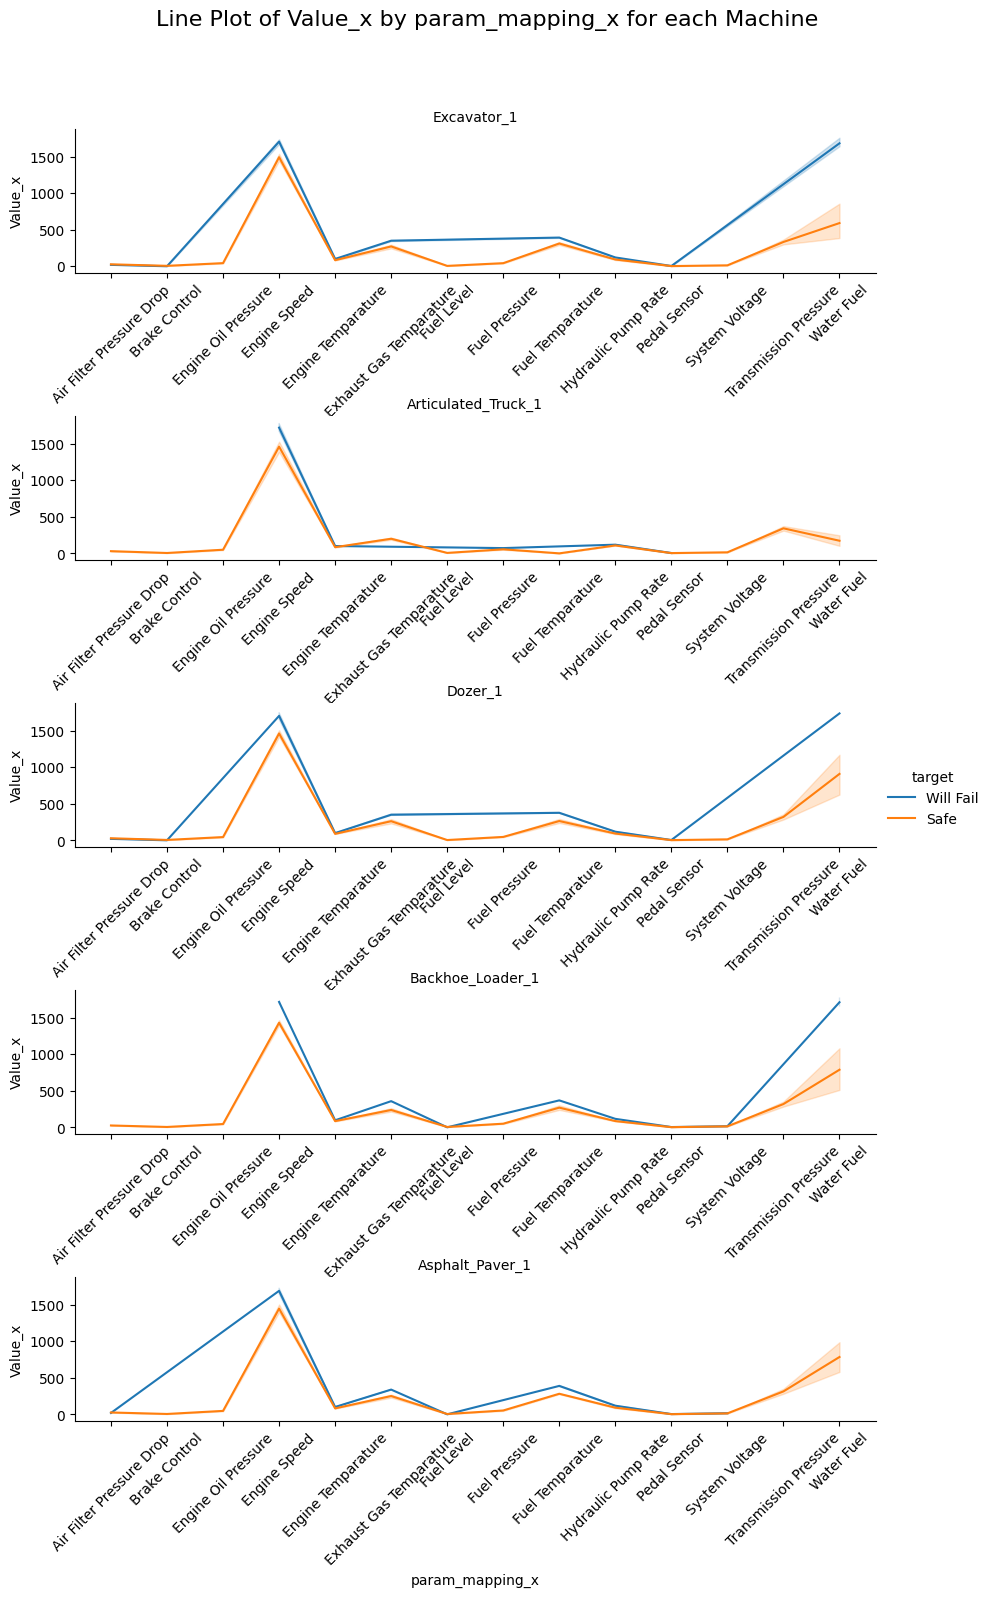

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame

# Convert param_mapping_x to a categorical type if it's not already
merged_df['param_mapping_x'] = merged_df['param_mapping_x'].astype('category')

# Create a FacetGrid with line plots and arrange machines in rows
g = sns.FacetGrid(merged_df, row="Machine", hue="target", height=3, aspect=3, sharex=False,
                  row_order=merged_df['Machine'].unique())
g.map(sns.lineplot, "param_mapping_x", "Value_x")
g.add_legend(title='target')
g.set_titles(row_template="{row_name}")
g.set_axis_labels("param_mapping_x", "Value_x")
g.set_xticklabels(rotation=45)

# Adjust hspace to add vertical space between rows
plt.subplots_adjust(top=0.9, hspace=1)

# Set the overall title
g.fig.suptitle('Line Plot of Value_x by param_mapping_x for each Machine', fontsize=16)

plt.show()